In [ ]:
from matplotlib import pyplot as plt
import networkx as nx
import numpy as np
import random

In [ ]:
class SocialDynamicsSimulationL:
    '''
    Simulate social dynamics by strengthening opinions and connection weights
    based on random interactions between nodes.
    '''

    def __init__(self, network_size=50, alpha=0.03, beta=0.3, gamma=4):
        '''
        Inputs:

            network_size (int) The number of nodes in the random Watts-Strogatz
              small-world network. Default: 50.

            alpha (float) The rate at which nodes adjust their opinions to
              match neighboring nodes' opinions during interactions.
              Default: 0.03.

            beta (float) The rate at which edge weights are changed in
              response to differing opinions. Default: 0.3.

            gamma (float) The pickiness of nodes. Nodes with opinions differing
              by more than 1/gamma will result in an edge weight decreasing.
              Default: 4.
        '''
        self.network_size = network_size
        self.alpha = alpha
        self.beta = beta
        self.gamma = gamma

    def initialize(self):
        '''
        Initialize the simulation with a random graph, with random 0 or 1
        opinions assigned to all nodes and initial edge weights of 0.5.
        '''
        #Maybe change this structure to add the subgroup
        self.graph = nx.watts_strogatz_graph(50, 5, 0.5)
        for edge in self.graph.edges:
            self.graph.edges[edge]['weight'] = 1
        for node in self.graph.nodes:
            #All nodes have opinion 1 to represent true fact
            #Start at 0.5 and introduce truth later
            #See how timing of adding truth affects the model
            self.graph.nodes[node]['opinion'] = np.random.normal(0.5, 0.15)
            self.graph.nodes[node]['persuasiveness'] = np.random.normal(0.8, 0.2)
        self.layout = nx.spring_layout(self.graph)  # Initial visual layout
        self.step = 0
        self.average = 0
        self.sd = 0
        self.avgArr = []
        self.arrSteps = []
        self.data = []
        self.dataSteps = []

    def observe(self):
        '''
        Draw the state of the network.
        '''
        self.layout = nx.spring_layout(self.graph, pos = self.layout, iterations=5)
        plt.clf()
        nx.draw(
            self.graph, pos=self.layout, with_labels=True,
            node_color=[self.graph.nodes[i]['opinion'] for i in self.graph.nodes],
            edge_color=[self.graph.edges[i, j]['weight'] for i, j in self.graph.edges],
            edge_cmap=plt.cm.binary, edge_vmin=0, edge_vmax=1,
            alpha=0.7, vmin=0, vmax=1)
        plt.title('Step: ' + str(self.step) + '   Avg Opinion: ' + str(self.average) + "   Opinion SD: " + str(self.sd))

    def update(self):
        #Add fake news when steps = 2000
        if self.step == 1:
            for i in range(1):
                randNum = random.randint(0, 49)
                self.graph.nodes[randNum]['opinion'] = 1  
        #if self.step == 400:
            #randomeNode = random.randint(0, 50)
            #Fact can't be the same node as false news
            #while randomeNode == randNum: 
                #randomeNode = random.randint(0, 50)
            #self.graph.nodes[randomeNode]['opinion'] = 1
        if random.uniform(0, 1) < 0.01:
            # Create a new edge with weight 0.5 between two unconnected nodes
            nodes = list(self.graph.nodes)
            while True:
                new_edge = random.sample(nodes, 2)
                if new_edge not in self.graph.edges:
                    break
            self.graph.add_edge(new_edge[0], new_edge[1], weight=0.5)
        else:
            average = 0
            node = 0
            arr = []
            data = []
            # Select a random edge and update node opinions and edge weight
            #Run and update every node/edge
            for x in self.graph.edges:
                opinions = [self.graph.nodes[n]['opinion'] for n in x]
                persuade = [self.graph.nodes[n]['persuasiveness'] for n in x]
                for i in [0, 1]:
                    #Don;t change fake news and fact opinion
                    if opinions[i] != 0 and opinions[i] != 1:
                        self.graph.nodes[x[i]]['opinion'] = (
                            opinions[i] + self.alpha * persuade[1-i] * (opinions[1-i] - opinions[i]))
                    average+=opinions[i]
                    arr.append(opinions[i])
                    data.append(opinions[i])
                    node += 1
            self.average = average/node
            self.sd = np.std(arr)
            if(self.step%100 == 0):
                self.avgArr.append(self.average)
                self.arrSteps.append(self.step)
            if(self.step%25 == 0):
                self.data.append(data)
                self.dataSteps.append(self.step)
        self.step += 1
#Choose nodes with highest connection or choose the nodes with highest persuasiveness or choose multiple random nodes

In [ ]:
class SocialDynamicsSimulationM:
    '''
    Simulate social dynamics by strengthening opinions and connection weights
    based on random interactions between nodes.
    '''

    def __init__(self, network_size=50, alpha=0.03, beta=0.3, gamma=4):
        '''
        Inputs:

            network_size (int) The number of nodes in the random Watts-Strogatz
              small-world network. Default: 50.

            alpha (float) The rate at which nodes adjust their opinions to
              match neighboring nodes' opinions during interactions.
              Default: 0.03.

            beta (float) The rate at which edge weights are changed in
              response to differing opinions. Default: 0.3.

            gamma (float) The pickiness of nodes. Nodes with opinions differing
              by more than 1/gamma will result in an edge weight decreasing.
              Default: 4.
        '''
        self.network_size = network_size
        self.alpha = alpha
        self.beta = beta
        self.gamma = gamma

    def initialize(self):
        '''
        Initialize the simulation with a random graph, with random 0 or 1
        opinions assigned to all nodes and initial edge weights of 0.5.
        '''
        #Maybe change this structure to add the subgroup
        self.graph = nx.watts_strogatz_graph(50, 5, 0.5)
        for edge in self.graph.edges:
            self.graph.edges[edge]['weight'] = 1
        for node in self.graph.nodes:
            #All nodes have opinion 1 to represent true fact
            #Start at 0.5 and introduce truth later
            #See how timing of adding truth affects the model
            self.graph.nodes[node]['opinion'] = np.random.normal(0.5, 0.15)
            self.graph.nodes[node]['persuasiveness'] = np.random.normal(1, 0.2)
        self.layout = nx.spring_layout(self.graph)  # Initial visual layout
        self.step = 0
        self.average = 0
        self.sd = 0
        self.avgArr = []
        self.arrSteps = []
        self.data = []
        self.dataSteps = []

    def observe(self):
        '''
        Draw the state of the network.
        '''
        self.layout = nx.spring_layout(self.graph, pos = self.layout, iterations=5)
        plt.clf()
        nx.draw(
            self.graph, pos=self.layout, with_labels=True,
            node_color=[self.graph.nodes[i]['opinion'] for i in self.graph.nodes],
            edge_color=[self.graph.edges[i, j]['weight'] for i, j in self.graph.edges],
            edge_cmap=plt.cm.binary, edge_vmin=0, edge_vmax=1,
            alpha=0.7, vmin=0, vmax=1)
        plt.title('Step: ' + str(self.step) + '   Avg Opinion: ' + str(self.average) + "   Opinion SD: " + str(self.sd))

    def update(self):
        #Add fake news when steps = 2000
        if self.step == 1:
            for i in range(1):
                randNum = random.randint(0, 49)
                self.graph.nodes[randNum]['opinion'] = 1  
        #if self.step == 400:
            #randomeNode = random.randint(0, 50)
            #Fact can't be the same node as false news
            #while randomeNode == randNum: 
                #randomeNode = random.randint(0, 50)
            #self.graph.nodes[randomeNode]['opinion'] = 1
        if random.uniform(0, 1) < 0.01:
            # Create a new edge with weight 0.5 between two unconnected nodes
            nodes = list(self.graph.nodes)
            while True:
                new_edge = random.sample(nodes, 2)
                if new_edge not in self.graph.edges:
                    break
            self.graph.add_edge(new_edge[0], new_edge[1], weight=0.5)
        else:
            average = 0
            node = 0
            arr = []
            data = []
            # Select a random edge and update node opinions and edge weight
            #Run and update every node/edge
            for x in self.graph.edges:
                opinions = [self.graph.nodes[n]['opinion'] for n in x]
                persuade = [self.graph.nodes[n]['persuasiveness'] for n in x]
                for i in [0, 1]:
                    #Don;t change fake news and fact opinion
                    if opinions[i] != 0 and opinions[i] != 1:
                        self.graph.nodes[x[i]]['opinion'] = (
                            opinions[i] + self.alpha * persuade[1-i] * (opinions[1-i] - opinions[i]))
                    average+=opinions[i]
                    arr.append(opinions[i])
                    data.append(opinions[i])
                    node += 1
            self.average = average/node
            self.sd = np.std(arr)
            if(self.step%100 == 0):
                self.avgArr.append(self.average)
                self.arrSteps.append(self.step)
            if(self.step%25 == 0):
                self.data.append(data)
                self.dataSteps.append(self.step)
        self.step += 1
#Choose nodes with highest connection or choose the nodes with highest persuasiveness or choose multiple random nodes

In [ ]:
class SocialDynamicsSimulationH:
    '''
    Simulate social dynamics by strengthening opinions and connection weights
    based on random interactions between nodes.
    '''

    def __init__(self, network_size=50, alpha=0.03, beta=0.3, gamma=4):
        '''
        Inputs:

            network_size (int) The number of nodes in the random Watts-Strogatz
              small-world network. Default: 50.

            alpha (float) The rate at which nodes adjust their opinions to
              match neighboring nodes' opinions during interactions.
              Default: 0.03.

            beta (float) The rate at which edge weights are changed in
              response to differing opinions. Default: 0.3.

            gamma (float) The pickiness of nodes. Nodes with opinions differing
              by more than 1/gamma will result in an edge weight decreasing.
              Default: 4.
        '''
        self.network_size = network_size
        self.alpha = alpha
        self.beta = beta
        self.gamma = gamma

    def initialize(self):
        '''
        Initialize the simulation with a random graph, with random 0 or 1
        opinions assigned to all nodes and initial edge weights of 0.5.
        '''
        #Maybe change this structure to add the subgroup
        self.graph = nx.watts_strogatz_graph(50, 5, 0.5)
        for edge in self.graph.edges:
            self.graph.edges[edge]['weight'] = 1
        for node in self.graph.nodes:
            #All nodes have opinion 1 to represent true fact
            #Start at 0.5 and introduce truth later
            #See how timing of adding truth affects the model
            self.graph.nodes[node]['opinion'] = np.random.normal(0.5, 0.15)
            self.graph.nodes[node]['persuasiveness'] = np.random.normal(1.2, 0.2)
        self.layout = nx.spring_layout(self.graph)  # Initial visual layout
        self.step = 0
        self.average = 0
        self.sd = 0
        self.avgArr = []
        self.arrSteps = []
        self.data = []
        self.dataSteps = []

    def observe(self):
        '''
        Draw the state of the network.
        '''
        self.layout = nx.spring_layout(self.graph, pos = self.layout, iterations=5)
        plt.clf()
        nx.draw(
            self.graph, pos=self.layout, with_labels=True,
            node_color=[self.graph.nodes[i]['opinion'] for i in self.graph.nodes],
            edge_color=[self.graph.edges[i, j]['weight'] for i, j in self.graph.edges],
            edge_cmap=plt.cm.binary, edge_vmin=0, edge_vmax=1,
            alpha=0.7, vmin=0, vmax=1)
        plt.title('Step: ' + str(self.step) + '   Avg Opinion: ' + str(self.average) + "   Opinion SD: " + str(self.sd))

    def update(self):
        #Add fake news when steps = 2000
        if self.step == 1:
            for i in range(1):
                randNum = random.randint(0, 49)
                self.graph.nodes[randNum]['opinion'] = 1  
        #if self.step == 400:
            #randomeNode = random.randint(0, 50)
            #Fact can't be the same node as false news
            #while randomeNode == randNum: 
                #randomeNode = random.randint(0, 50)
            #self.graph.nodes[randomeNode]['opinion'] = 1
        if random.uniform(0, 1) < 0.01:
            # Create a new edge with weight 0.5 between two unconnected nodes
            nodes = list(self.graph.nodes)
            while True:
                new_edge = random.sample(nodes, 2)
                if new_edge not in self.graph.edges:
                    break
            self.graph.add_edge(new_edge[0], new_edge[1], weight=0.5)
        else:
            average = 0
            node = 0
            arr = []
            data = []
            # Select a random edge and update node opinions and edge weight
            #Run and update every node/edge
            for x in self.graph.edges:
                opinions = [self.graph.nodes[n]['opinion'] for n in x]
                persuade = [self.graph.nodes[n]['persuasiveness'] for n in x]
                for i in [0, 1]:
                    #Don;t change fake news and fact opinion
                    if opinions[i] != 0 and opinions[i] != 1:
                        self.graph.nodes[x[i]]['opinion'] = (
                            opinions[i] + self.alpha * persuade[1-i] * (opinions[1-i] - opinions[i]))
                    average+=opinions[i]
                    arr.append(opinions[i])
                    data.append(opinions[i])
                    node += 1
            self.average = average/node
            self.sd = np.std(arr)
            if(self.step%100 == 0):
                self.avgArr.append(self.average)
                self.arrSteps.append(self.step)
            if(self.step%25 == 0):
                self.data.append(data)
                self.dataSteps.append(self.step)
        self.step += 1
#Choose nodes with highest connection or choose the nodes with highest persuasiveness or choose multiple random nodes

In [ ]:
simH = SocialDynamicsSimulationH()
simM = SocialDynamicsSimulationM()
simL = SocialDynamicsSimulationL()
simH.initialize()
simM.initialize()
simL.initialize()
import pandas as pd
avgH=[]
meanH=[]
avgM=[]
meanM=[]
avgL=[]
meanL=[]
lowIndex=[]
highIndex=[]
lowIndexH=[]
highIndexH=[]
lowIndexM=[]
highIndexM=[]
lowIndexL=[]
highIndexL=[]

for i in range(100):
    for j in range(10):
        for k in range(100):
            simH.update()
            simM.update()
            simL.update()
    avgH.append(simH.avgArr)
    avgM.append(simM.avgArr)
    avgL.append(simL.avgArr)
    simH.initialize()
    simM.initialize()
    simL.initialize()
    
#convert avgP (python list) into pandas dataframe (library)
df = pd.DataFrame(avgH, columns = ['Steps 100','Steps 200','Steps 300','Steps 400','Steps 500','Steps 600','Steps 700','Steps 800','Steps 900','Steps 1000'])
df2 = pd.DataFrame(avgM, columns = ['Steps 100','Steps 200','Steps 300','Steps 400','Steps 500','Steps 600','Steps 700','Steps 800','Steps 900','Steps 1000'])
df3 = pd.DataFrame(avgL, columns = ['Steps 100','Steps 200','Steps 300','Steps 400','Steps 500','Steps 600','Steps 700','Steps 800','Steps 900','Steps 1000'])
for i in ['Steps 100','Steps 200','Steps 300','Steps 400','Steps 500','Steps 600','Steps 700','Steps 800','Steps 900','Steps 1000']:
    meanH.append(df[i].mean())
    meanM.append(df2[i].mean())
    meanL.append(df3[i].mean())
    lowIndex.append(df3[i].quantile(0.025))
    highIndex.append(df3[i].quantile(0.975))
    lowIndexH.append(df[i].quantile(0.025))
    highIndexH.append(df[i].quantile(0.975))
    lowIndexM.append(df2[i].quantile(0.025))
    highIndexM.append(df2[i].quantile(0.975))
    lowIndexL.append(df3[i].quantile(0.025))
    highIndexL.append(df3[i].quantile(0.975))



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df.to_csv('/content/drive/MyDrive/Exp2_Persuasive_csv_file.csv')
df2.to_csv('/content/drive/MyDrive/Exp2_Connection_csv_file.csv')
df3.to_csv('/content/drive/MyDrive/Exp2_Random_csv_file.csv')
meanH=[]
meanM=[]
meanL=[]
lowIndex=[]
highIndex=[]
lowIndexH=[]
highIndexH=[]
lowIndexM=[]
highIndexM=[]
lowIndexL=[]
highIndexL=[]
for i in ['Steps 100','Steps 200','Steps 300','Steps 400','Steps 500','Steps 600','Steps 700','Steps 800','Steps 900','Steps 1000']:
    meanH.append(df[i].mean())
    meanM.append(df2[i].mean())
    meanL.append(df3[i].mean())
    lowIndex.append(df3[i].quantile(0.025))
    highIndex.append(df3[i].quantile(0.975))
    lowIndexH.append(df[i].quantile(0.025))
    highIndexH.append(df[i].quantile(0.975))
    lowIndexM.append(df2[i].quantile(0.025))
    highIndexM.append(df2[i].quantile(0.975))
    lowIndexL.append(df3[i].quantile(0.025))
    highIndexL.append(df3[i].quantile(0.975))

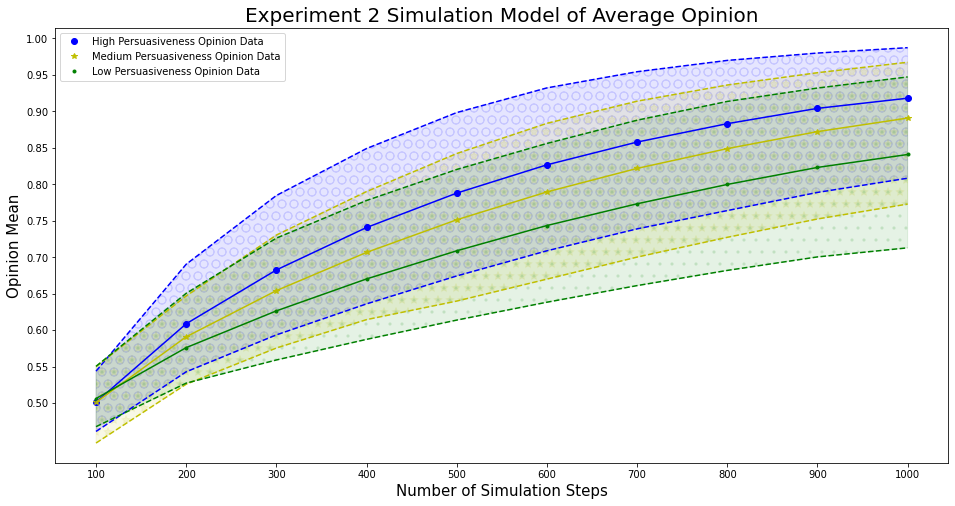

High Persuasiveness Area = 7.001719458799609
Medium Persuasiveness Area = 6.731729442003893
Low Persuasiveness Area = 6.394897474179044


In [ ]:
plt.figure(figsize=(16,8))
plt.title("Experiment 2 Simulation Model of Average Opinion", fontsize=20)
plt.xlabel("Number of Simulation Steps", fontsize=15)
plt.ylabel("Opinion Mean", fontsize=15)
plt.yticks([0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1])
plt.xticks([100, 200, 300, 400, 500, 600, 700, 800, 900, 1000])
plt.plot([100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], meanH, 'bo', marker='o')
plt.plot([100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], meanM, 'yo', marker='*')
plt.plot([100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], meanL, 'go', marker='.')
plt.plot([100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], meanH,'b')
plt.plot([100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], meanM,'y')
plt.plot([100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], meanL,'g')


plt.plot([100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], highIndexH,'b--')
plt.plot([100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], lowIndexH,'b--')
plt.plot([100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], highIndexM,'y--')
plt.plot([100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], lowIndexM,'y--')
plt.plot([100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], highIndexL,'g--')
plt.plot([100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], lowIndexL,'g--')

lH=np.array(lowIndexH)
hH=np.array(highIndexH)
lM=np.array(lowIndexM)
hM=np.array(highIndexM)
lL=np.array(lowIndexL)
hL=np.array(highIndexL)
plt.fill_between([100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], lH, hH, color='b', hatch='O', alpha=.1)
plt.fill_between([100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], lM, hM, color='y', hatch='*', alpha=.1)
plt.fill_between([100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], lL, hL, color='g', hatch='.', alpha=.1)

plt.legend(["High Persuasiveness Opinion Data", "Medium Persuasiveness Opinion Data", "Low Persuasiveness Opinion Data"])
plt.show()

area = np.trapz(meanH)
print("High Persuasiveness Area =", area)
area = np.trapz(meanM)
print("Medium Persuasiveness Area =", area)
area = np.trapz(meanL)
print("Low Persuasiveness Area =", area)